<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/LinearRegressionProjectKrishNaik/ModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
from google.colab import files
uploaded = files.upload()

Saving Algerian_forest_fires_cleaned_dataset.csv to Algerian_forest_fires_cleaned_dataset (1).csv


In [94]:
df = pd.read_csv('/content/Algerian_forest_fires_cleaned_dataset (1).csv')

In [95]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [96]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [97]:
# drop month, day and year
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [98]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [99]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [100]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [101]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [102]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [103]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [122]:
# independent and dependent features
x = df.drop('FWI', axis=1)
y = df['FWI']

In [123]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [124]:
y.head()

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5


In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [127]:
# feature selection based on correlation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


<Axes: >

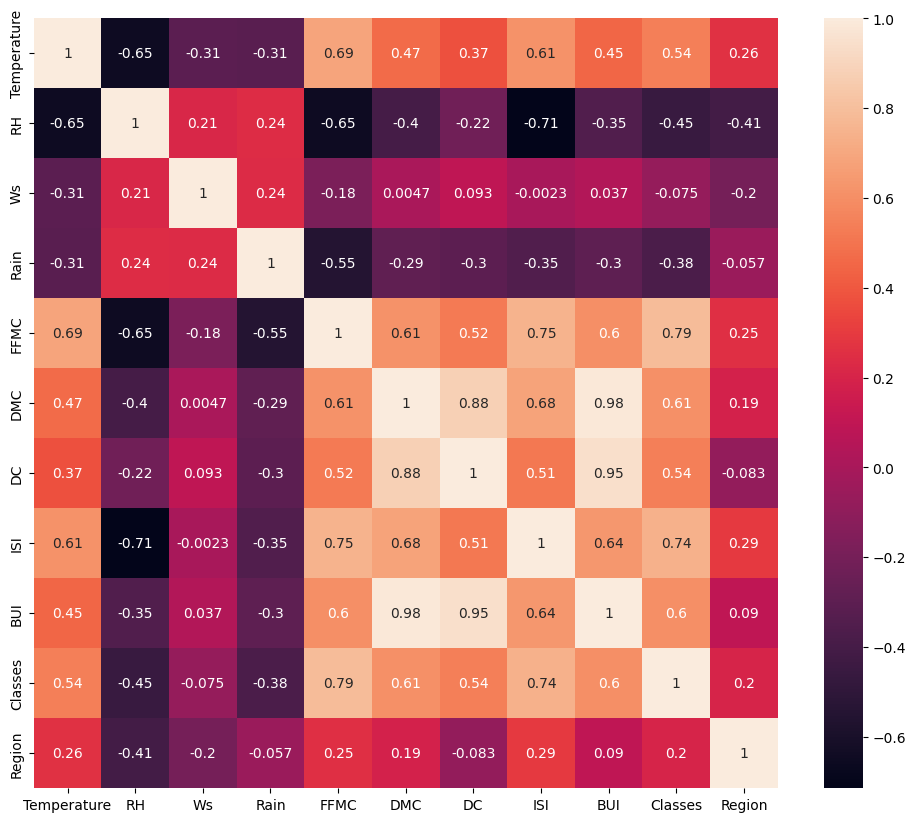

In [128]:
# check for multi collinearity
plt.figure(figsize=(12, 10))
corr = x_train.corr()
sns.heatmap(corr, annot=True)

In [129]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = x_train.corr()

  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns[i];
        col_corr.add(colname)

  return col_corr

In [130]:
# threshold---> Domain Expertise
corr_features = correlation(x_train, 0.85)

In [131]:
corr_features

{'BUI', 'DC'}

In [132]:
# drop features when correlation is more than 0.85
x_train.drop(corr_features, axis=1, inplace=True)
x_test.drop(corr_features, axis=1, inplace=True)
print(x_train.shape, x_test.shape)

(194, 9) (49, 9)


Feature Scaling or Standardization

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [134]:
x_train_scaled

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
        -1.14434427, -1.01036297]])

Box Plots to Understand Effect of Standard Scaler

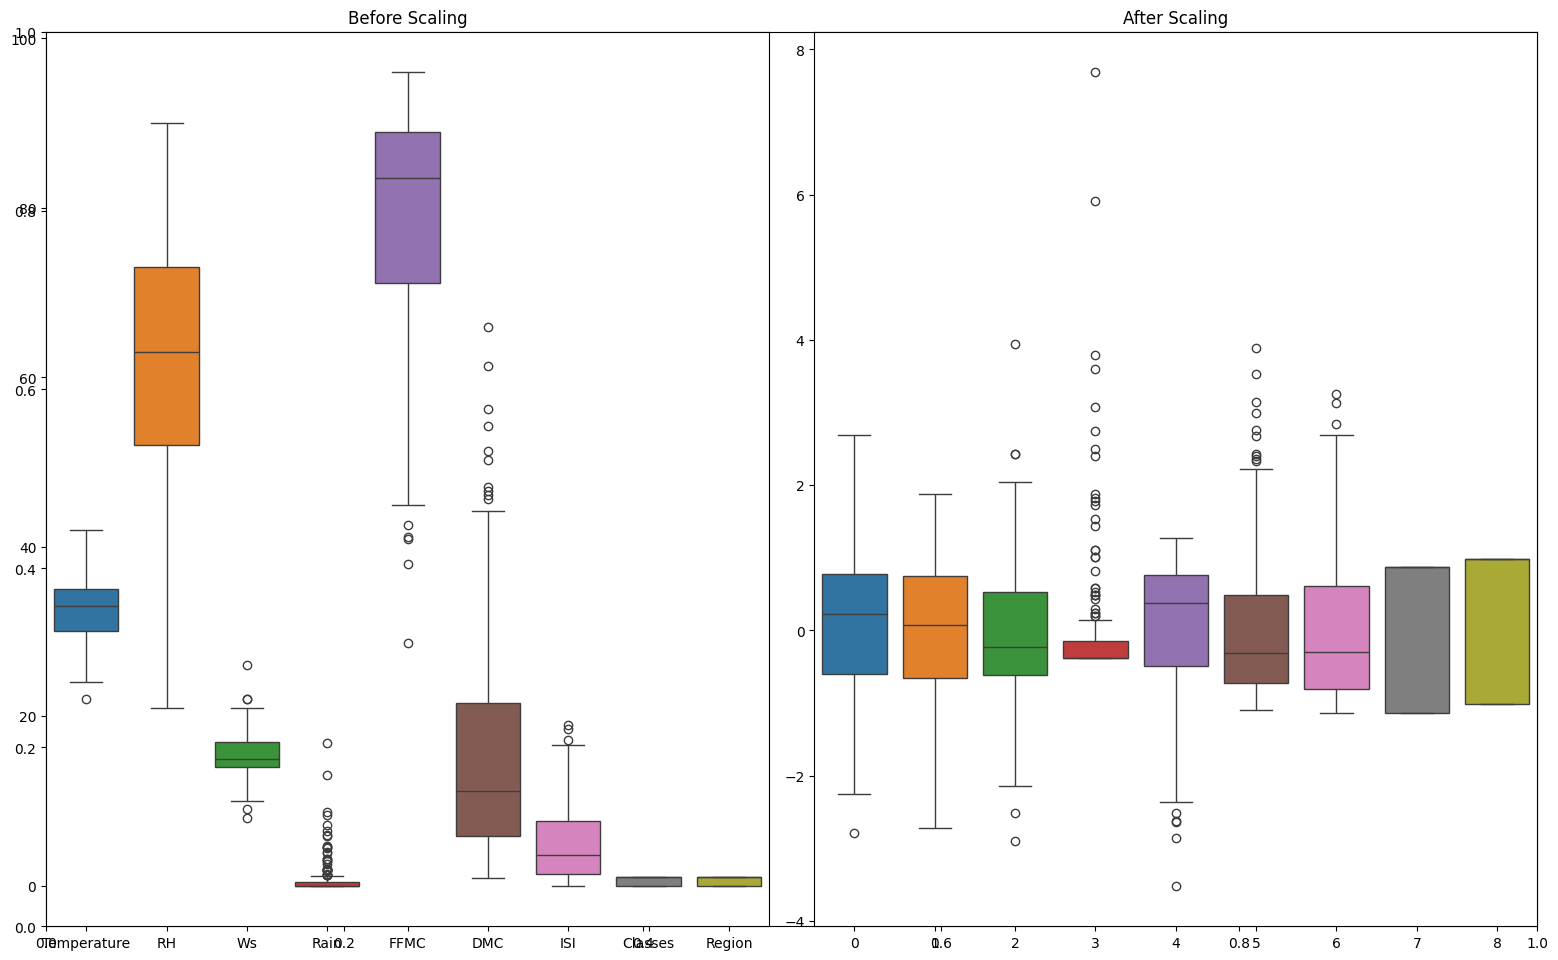

In [135]:
plt.subplots(figsize=(16, 10))

plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title('Before Scaling')

plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title('After Scaling')

plt.tight_layout()
plt.show()

Linear Regression Model

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linear_reg = LinearRegression()
linear_reg.fit(x_train_scaled, y_train)
y_pred = linear_reg.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error : ", mae)
print("R2 Score : ", score)




Mean Absolute Error :  0.5049978694165687
R2 Score :  0.9805895859259882


Text(0.5, 1.0, 'Actual vs Predicted(colored by error)')

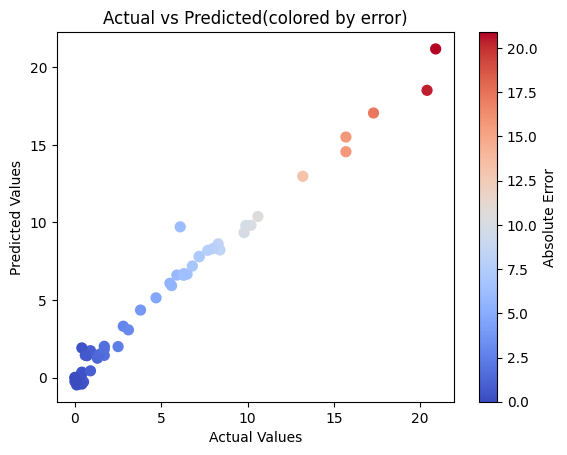

In [137]:
plt.scatter(y_test, y_pred, c=y_test, cmap='coolwarm', s=50)
plt.colorbar(label="Absolute Error")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.title('Actual vs Predicted(colored by error)')

Lasso Regression

In [138]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso_reg = Lasso()

lasso_reg.fit(x_train_scaled, y_train)
y_pred1 = lasso_reg.predict(x_test_scaled)

mae1 = mean_absolute_error(y_test, y_pred1)
score1 = r2_score(y_test, y_pred1)

print("Mean Absolute Error : ", mae1)
print("R2 Score : ", score1)

Mean Absolute Error :  1.0093958923873407
R2 Score :  0.9430507350726562


Text(0.5, 1.0, 'Actual vs Predicted(colored by error)')

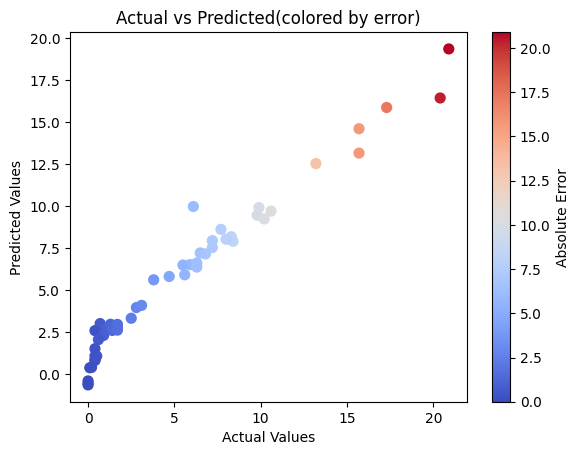

In [139]:
plt.scatter(y_test, y_pred1, c=y_test, cmap='coolwarm', s=50)
plt.colorbar(label="Absolute Error")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.title('Actual vs Predicted(colored by error)')

Cross Validation Lasso

In [140]:
from sklearn.linear_model import LassoCV
lassoCV = LassoCV(cv=5, random_state=9)
lassoCV.fit(x_train_scaled, y_train)

LassoCV(cv=5, random_state=9)

In [141]:
lassoCV.alphas_

array([7.1563667 , 6.67405153, 6.2242428 , 5.80474966, 5.41352896,
       5.04867523, 4.70841142, 4.39108025, 4.09513613, 3.81913766,
       3.56174057, 3.32169117, 3.09782031, 2.88903759, 2.69432612,
       2.51273756, 2.34338746, 2.18545099, 2.0381589 , 1.90079382,
       1.77268667, 1.65321353, 1.54179247, 1.43788081, 1.34097246,
       1.2505954 , 1.16630946, 1.08770411, 1.01439649, 0.94602956,
       0.88227033, 0.82280827, 0.76735374, 0.71563667, 0.66740515,
       0.62242428, 0.58047497, 0.5413529 , 0.50486752, 0.47084114,
       0.43910802, 0.40951361, 0.38191377, 0.35617406, 0.33216912,
       0.30978203, 0.28890376, 0.26943261, 0.25127376, 0.23433875,
       0.2185451 , 0.20381589, 0.19007938, 0.17726867, 0.16532135,
       0.15417925, 0.14378808, 0.13409725, 0.12505954, 0.11663095,
       0.10877041, 0.10143965, 0.09460296, 0.08822703, 0.08228083,
       0.07673537, 0.07156367, 0.06674052, 0.06224243, 0.0580475 ,
       0.05413529, 0.05048675, 0.04708411, 0.0439108 , 0.04095

In [142]:
lassoCV.alpha_

np.float64(0.04391080246587261)

In [143]:
lassoCV.mse_path_

array([[68.58934997, 64.28650232, 49.25415197, 79.11474083, 38.68688171],
       [63.2664675 , 58.77362304, 43.20292636, 77.07183352, 34.66910628],
       [56.87389457, 51.79652473, 37.15764773, 69.4806422 , 31.16497557],
       [51.2737596 , 45.69461734, 31.98560721, 62.80993539, 27.46286399],
       [45.36816855, 40.35928545, 27.56726322, 56.94442062, 23.75447628],
       [39.875005  , 35.69250404, 23.79907917, 50.31847875, 20.54655878],
       [35.0794232 , 31.60885664, 20.59132915, 44.35263414, 17.77349727],
       [30.89154006, 28.0342798 , 17.86626498, 39.14265375, 15.37720198],
       [27.23334321, 24.90389594, 15.55674604, 34.59116894, 13.30754905],
       [24.03652419, 22.16129069, 13.60451947, 30.61376519, 11.52101422],
       [21.24273995, 19.75730052, 11.95924131, 27.13693185,  9.97950732],
       [18.80004176, 17.64896267, 10.57738151, 24.09623192,  8.65087048],
       [16.66356323, 15.79916526,  9.42117661, 21.43679316,  7.50627555],
       [14.79422393, 14.17520895,  8.4

Mean Absolute Error :  0.5556715031617872
R2 Score :  0.978328234520343


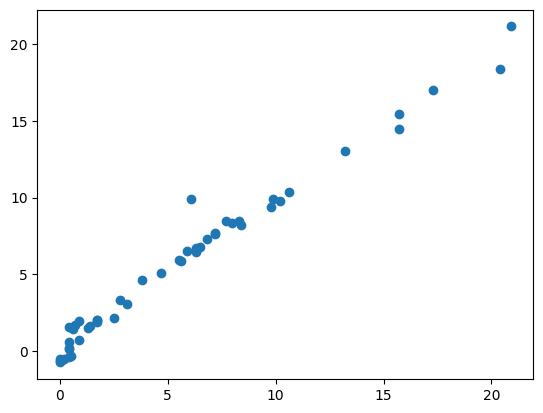

In [145]:
y_pred2 = lassoCV.predict(x_test_scaled)
plt.scatter(y_test, y_pred2)

mae = mean_absolute_error(y_test, y_pred2)
score = r2_score(y_test, y_pred2)

print("Mean Absolute Error : ", mae)
print("R2 Score : ", score)

Ridge Regression Model

Mean Absolute Error :  0.5192048325844797
R2 Score :  0.9801058063273599


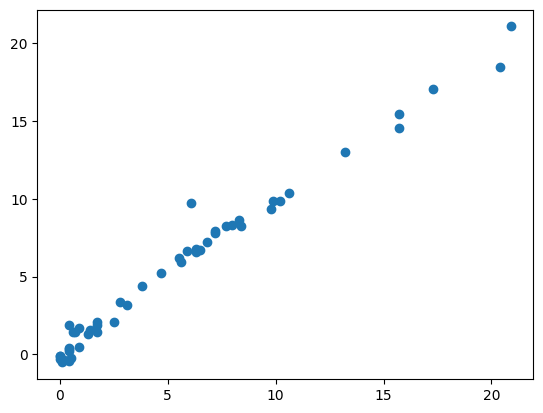

In [146]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()

ridge.fit(x_train_scaled, y_train)
y_pred3 = ridge.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred3)
score = r2_score(y_test, y_pred3)

print("Mean Absolute Error : ", mae)
print("R2 Score : ", score)

plt.scatter(y_test, y_pred3)


Mean Absolute Error :  0.6869262008277153
R2 Score :  0.9722193780965623


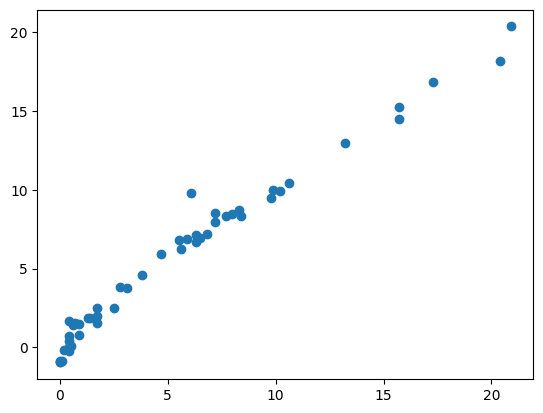

In [147]:
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(cv=5)

ridgeCV.fit(x_train_scaled, y_train)
y_pred4 = ridgeCV.predict(x_test_scaled)

plt.scatter(y_test, y_pred4)

mae = mean_absolute_error(y_test, y_pred4)
score = r2_score(y_test, y_pred4)

print("Mean Absolute Error : ", mae)
print("R2 Score : ", score)

In [148]:
ridgeCV.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

ElasticNet Regression

Mean Absolute Error :  1.6834416340136709
R2 Score :  0.8676961352267807


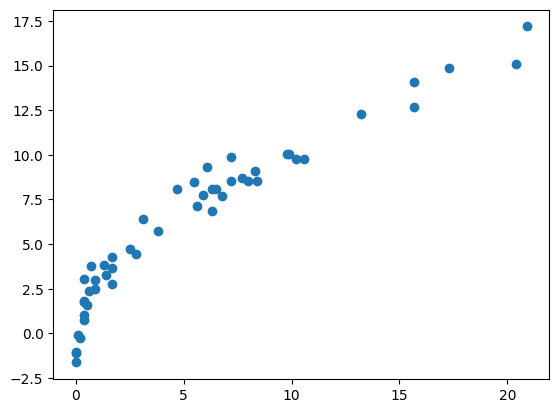

In [150]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

elastic.fit(x_train_scaled, y_train)
y_pred5 = elastic.predict(x_test_scaled)

plt.scatter(y_test, y_pred5)

mae = mean_absolute_error(y_test, y_pred5)
score = r2_score(y_test, y_pred5)

print("Mean Absolute Error : ", mae)
print("R2 Score : ", score)

Mean Absolute Error :  0.5710147088777218
R2 Score :  0.9781014571778188


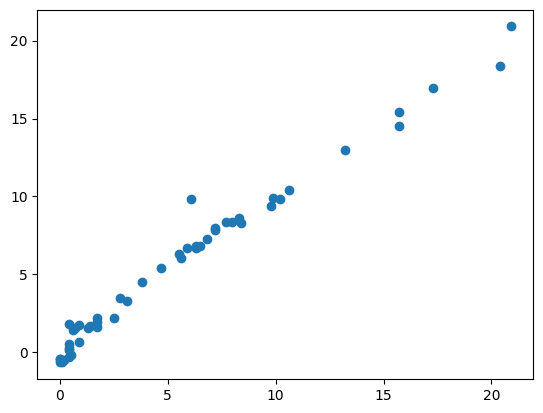

In [151]:
from sklearn.linear_model import ElasticNetCV
elasticCV = ElasticNetCV(cv=5)

elasticCV.fit(x_train_scaled, y_train)
y_pred6 = elasticCV.predict(x_test_scaled)

plt.scatter(y_test, y_pred6)

mae = mean_absolute_error(y_test, y_pred6)
score = r2_score(y_test, y_pred6)

print("Mean Absolute Error : ", mae)
print("R2 Score : ", score)

In [153]:
elasticCV.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

#pickle the machine learning models, preprocessing model standardScaler

In [154]:
scaler

StandardScaler()

In [155]:
ridge

Ridge()

In [156]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))